In [83]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score, log_loss, precision_recall_curve, roc_curve, RocCurveDisplay, PrecisionRecallDisplay


In [63]:
# Set pandas display options for better readability
pd.set_option("display.max_rows", 500)
pd.set_option("display.max_columns", 500)
pd.set_option("display.width", 1000)

# Load data (assuming the data is in a .csv file)
df = pd.read_csv("bioresponse.csv")
df.head(9)

,Activity,D1,D2,D3,D4,D5,D6,D7,D8,D9,D10,D11,D12,D13,D14,D15,D16,D17,D18,D19,D20,D21,D22,D23,D24,D25,D26,D27,D28,D29,D30,D31,D32,D33,D34,D35,D36,D37,D38,D39,D40,D41,D42,D43,D44,D45,D46,D47,D48,D49,D50,D51,D52,D53,D54,D55,D56,D57,D58,D59,D60,D61,D62,D63,D64,D65,D66,D67,D68,D69,D70,D71,D72,D73,D74,D75,D76,D77,D78,D79,D80,D81,D82,D83,D84,D85,D86,D87,D88,D89,D90,D91,D92,D93,D94,D95,D96,D97,D98,D99,D100,D101,D102,D103,D104,D105,D106,D107,D108,D109,D110,D111,D112,D113,D114,D115,D116,D117,D118,D119,D120,D121,D122,D123,D124,D125,D126,D127,D128,D129,D130,D131,D132,D133,D134,D135,D136,D137,D138,D139,D140,D141,D142,D143,D144,D145,D146,D147,D148,D149,D150,D151,D152,D153,D154,D155,D156,D157,D158,D159,D160,D161,D162,D163,D164,D165,D166,D167,D168,D169,D170,D171,D172,D173,D174,D175,D176,D177,D178,D179,D180,D181,D182,D183,D184,D185,D186,D187,D188,D189,D190,D191,D192,D193,D194,D195,D196,D197,D198,D199,D200,D201,D202,D203,D204,D205,D206,D207,D208,D209,D210,D211,D212,D213,D214,D215,D216,D217,D218,D219,D220,D221,D222,D223,D224,D225,D226,D227,D228,D229,D230,D231,D232,D233,D234,D235,D236,D237,D238,D239,D240,D241,D242,D243,D244,D245,D246,D247,D248,D249,...,D1527,D1528,D1529,D1530,D1531,D1532,D1533,D1534,D1535,D1536,D1537,D1538,D1539,D1540,D1541,D1542,D1543,D1544,D1545,D1546,D1547,D1548,D1549,D1550,D1551,D1552,D1553,D1554,D1555,D1556,D1557,D1558,D1559,D1560,D1561,D1562,D1563,D1564,D1565,D1566,D1567,D1568,D1569,D1570,D1571,D1572,D1573,D1574,D1575,D1576,D1577,D1578,D1579,D1580,D1581,D1582,D1583,D1584,D1585,D1586,D1587,D1588,D1589,D1590,D1591,D1592,D1593,D1594,D1595,D1596,D1597,D1598,D1599,D1600,D1601,D1602,D1603,D1604,D1605,D1606,D1607,D1608,D1609,D1610,D1611,D1612,D1613,D1614,D1615,D1616,D1617,D1618,D1619,D1620,D1621,D1622,D1623,D1624,D1625,D1626,D1627,D1628,D1629,D1630,D1631,D1632,D1633,D1634,D1635,D1636,D1637,D1638,D1639,D1640,D1641,D1642,D1643,D1644,D1645,D1646,D1647,D1648,D1649,D1650,D1651,D1652,D1653,D1654,D1655,D1656,D1657,D1658,D1659,D1660,D1661,D1662,D1663,D1664,D1665,D1666,D1667,D1668,D1669,D1670,D1671,D1672,D1673,D1674,D1675,D1676,D1677,D1678,D1679,D1680,D1681,D1682,D1683,D1684,D1685,D1686,D1687,D1688,D1689,D1690,D1691,D1692,D1693,D1694,D1695,D1696,D1697,D1698,D1699,D1700,D1701,D1702,D1703,D1704,D1705,D1706,D1707,D1708,D1709,D1710,D1711,D1712,D1713,D1714,D1715,D1716,D1717,D1718,D1719,D1720,D1721,D1722,D1723,D1724,D1725,D1726,D1727,D1728,D1729,D1730,D1731,D1732,D1733,D1734,D1735,D1736,D1737,D1738,D1739,D1740,D1741,D1742,D1743,D1744,D1745,D1746,D1747,D1748,D1749,D1750,D1751,D1752,D1753,D1754,D1755,D1756,D1757,D1758,D1759,D1760,D1761,D1762,D1763,D1764,D1765,D1766,D1767,D1768,D1769,D1770,D1771,D1772,D1773,D1774,D1775,D1776
0,1,0.000000,0.497009,0.10,0.00,0.132956,0.678031,0.273166,0.585445,0.743663,0.243144,0.187856,0.0000,0.000000,0.069000,0.362012,0.301773,0.597930,0.190813,0.107219,0.070500,0.00717,0.137931,1,0.00,0.496683,0.753131,1,1,0.000000,0.262919,0.077200,0.082700,0.200590,0.00000,0.000000,0.0000,0.0,0.162383,0.150153,0.000000,0.0,0.0000,0.000000,0.092000,0.057300,0.426576,0.234822,0.050200,0.000000,0.833333,0,1.000000,0.121520,0.000000,0.000000,0.000000,0.035100,0.133438,0.000,0.00000,0.011700,0.000000,0.000000,0.000000,0.034600,0.027100,0.361513,0.000000,0.075300,0.611301,0.000000,0,0.263109,0.189941,0.000000,0.083500,0.166667,0.01350,0.285714,0.015700,0.000000,0.00,0.222222,0.045500,0.00000,0.027800,0.307537,0.069400,0.604357,0.340425,0.451980,0.000000,0.047600,0,0.000335,0.066700,0.000000,0.0,0.599647,0.378793,0.375001,0.208918,0.343913,0.472849,0.262044,0.223825,0.749741,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.263158,0.000000,0.0667,0.000000,0.138889,0.238095,0.000000,0.0000,0.0,0.000000,0.333333,0.0000,0.0000,0.190476,0.0,0.00,0.1875,0.000000,0.0,0.307692,0.000000,0.0,0.0,0.000000,0.000000,0.057100,0.121212,0.0,0.0000,0.000000,0.285714,0.000000,0.000000,0.0645,0.000000,0.0000,0.166667,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0,0.0,0.0,0.000000,0.0,0.142939,0.0,0.422

#### Shuffle and split the data to train and test (75%/25%)

In [64]:
# Set the target variable and the features
target = "Activity"
features = df.drop(columns=target).columns

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    df[features],          # Features (all columns except 'Activity')
    df[target],            # Target variable ('Activity')
    test_size=0.25,         # Set the proportion of test data (25%)
    shuffle=True,           # Shuffle the data before splitting
    stratify=df[target],   # Preserve the target class distribution in both train and test sets
    random_state=10         # Use a fixed random seed for reproducibility
)

#### Let's check if the stratification has preserved the target class distribution in both train and test sets, you can compare the proportions of each class in the original dataset, training set, and test set.

In [65]:
# Calculate the percentage of each class in the original dataset, training set, and test set
original_proportions = df[target].value_counts(normalize=True) * 100
train_proportions = y_train.value_counts(normalize=True) * 100
test_proportions = y_test.value_counts(normalize=True) * 100

# Create a new DataFrame to compare the proportions
proportions_comparison = pd.DataFrame({
    "Original": original_proportions,
    "Train": train_proportions,
    "Test": test_proportions,
})

# Display the proportions comparison
print(proportions_comparison)


   Original      Train       Test
1  54.22554  54.212584  54.264392
0  45.77446  45.787416  45.735608


Helper metrics function

In [73]:
# Define function to calculate performance metrics and print them
def get_metrics(classifier, Y_true, Y_predict, label=""):
    # Calculate precision, recall, accuracy, and F1-score
    precision = metrics.precision_score(Y_true, Y_predict)
    recall = metrics.recall_score(Y_true, Y_predict)
    accuracy = metrics.accuracy_score(Y_true, Y_predict)
    f1_score = metrics.f1_score(Y_true, Y_predict)

    # Print the metrics
    print(f"Metrics for {label}")
    print(f"Precision: {precision:.3f}")
    print(f"Recall: {recall:.3f}")
    print(f"Accuracy: {accuracy:.3f}")
    print(f"F1-score: {f1_score:.3f}")

    # Calculate log loss
    log_loss = metrics.log_loss(Y_true, classifier.predict_proba(X_test)[:, 1])
    print(f"Log-Loss: {log_loss:.3f}")


# Define function to generate ROC curve plot
def get_ROC_plot(classifier, Y_true, Y_predict, label=""):
    # Calculate fpr and tpr for different threshold values
    fpr, tpr, threshold = metrics.roc_curve(Y_true, Y_predict)
    # Calculate AUC score
    auc_score = metrics.roc_auc_score(Y_true, Y_predict)

    # Plot ROC curve
    plt.figure(figsize=(7, 5))
    plt.plot(fpr, tpr, 'b-', label=f"{label} AUC: {auc_score:.3f}")
    plt.plot([0, 1], [0, 1], 'm--')
    plt.legend(loc="lower right")
    plt.title(f"ROC curve for {label}")
    plt.grid(True)
    plt.xlabel("False positive rate")
    plt.ylabel("True positive rate")
    plt.show()


# Define function to generate precision-recall plot
def get_prec_recall_plot(Y_true, Y_predict, label_plot=""):
    # Calculate precision and recall for different threshold values
    precision, recall, threshold = metrics.precision_recall_curve(Y_true, Y_predict)

    # Plot precision and recall curves
    plt.figure(figsize=(7, 5))
    plt.grid(True)
    plt.plot(threshold, precision[:-1], label="precision")
    plt.plot(threshold, recall[:-1], label="recall")
    plt.xlabel("threshold")
    plt.title(f"Precision-Recall curves for {label_plot}")
    plt.legend()


#### Small Decision Tree

Metrics for Small tree
Precision: 0.721
Recall: 0.839
Accuracy: 0.737
F1-score: 0.776
Log-Loss: 0.567


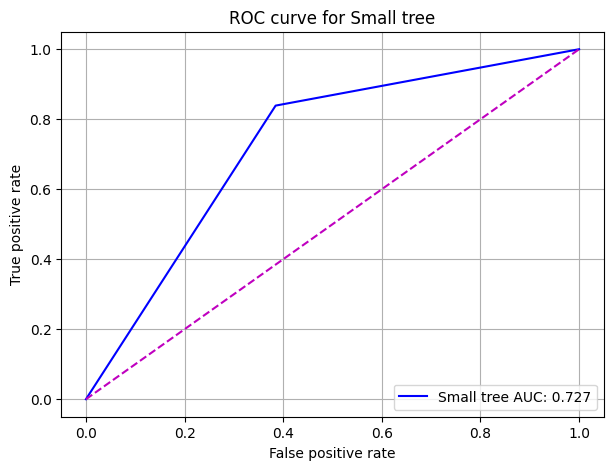

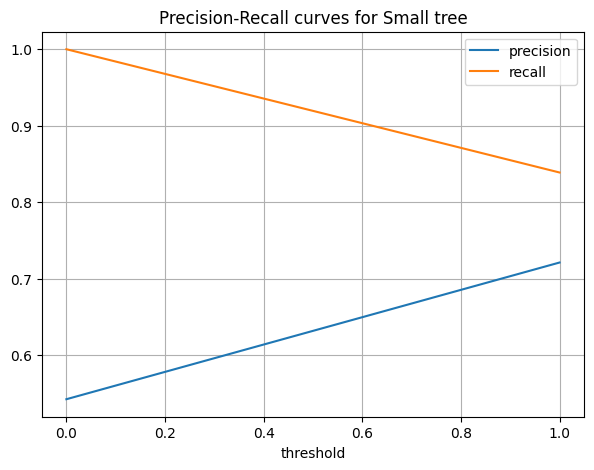

In [90]:
model_1 = tree.DecisionTreeClassifier(random_state=42, max_depth=2)
# Train the model using the training dataset with Decision Tree Classifier
model_1.fit(X_train, y_train)
predicted_values = model_1.predict(X_test)

# Get the evaluation metrics for the small tree model
get_metrics(model_1, y_test, predicted_values, "Small tree")
get_ROC_plot(model_1, y_test, predicted_values, "Small tree")
get_prec_recall_plot(y_test, predicted_values, "Small tree")

#### Deep Decision Tree

Metrics for Deep tree
Precision: 0.736
Recall: 0.849
Accuracy: 0.753
F1-score: 0.788
Log-Loss: 0.555


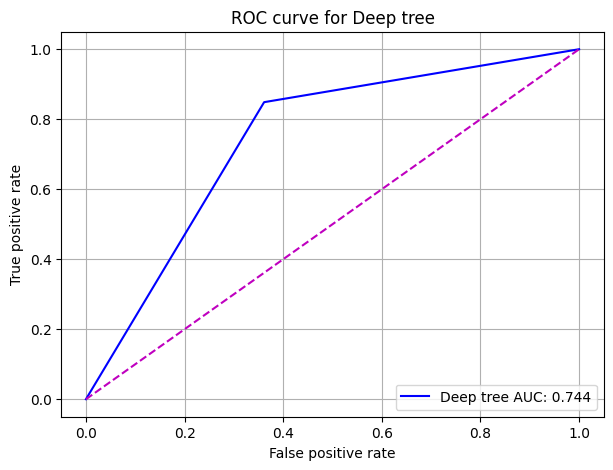

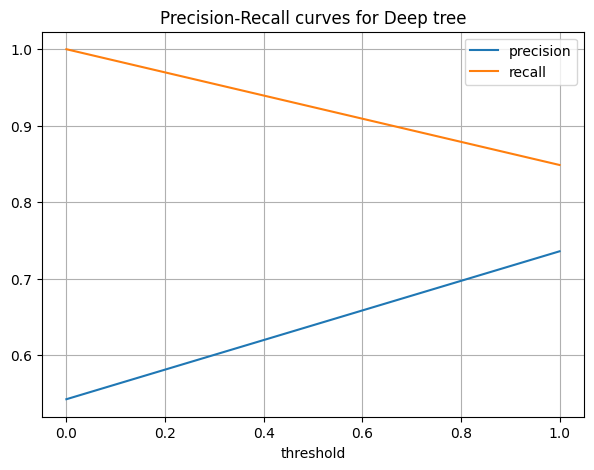

In [91]:
model_2 = tree.DecisionTreeClassifier(random_state=42, max_depth = 3)
# Train the model using the training dataset with Decision Tree Classifier
model_2.fit(X_train, y_train)  
predicted_values = model_2.predict(X_test)

# Get the evaluation metrics for the deep tree model
get_metrics(model_2, y_test, predicted_values, "Deep tree")   
get_ROC_plot(model_2, y_test, predicted_values, "Deep tree")
get_prec_recall_plot(y_test, predicted_values, "Deep tree")


#### Random Forest on Small Trees

Metrics for RF small tree
Precision: 0.676
Recall: 0.792
Accuracy: 0.681
F1-score: 0.729
Log-Loss: 0.625


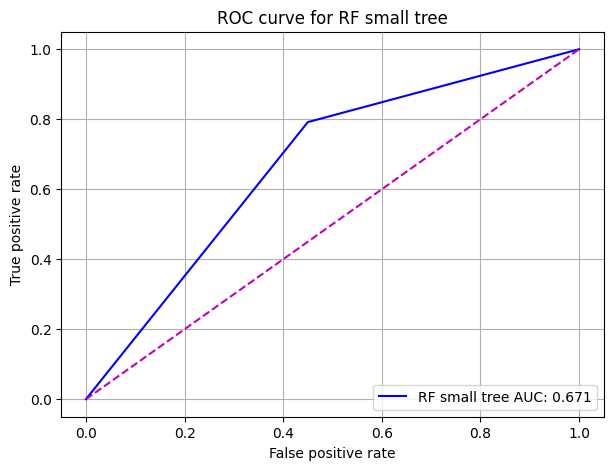

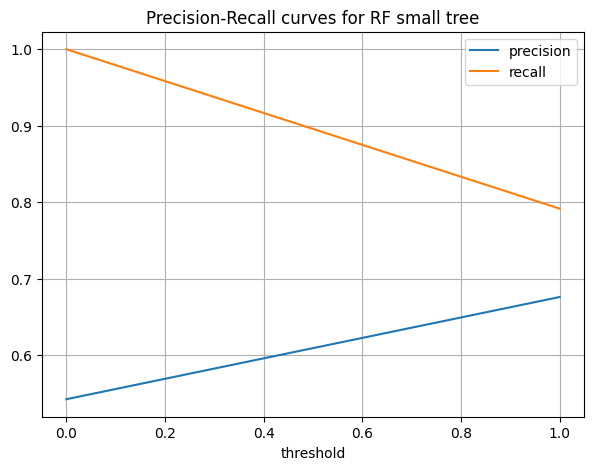

In [92]:
model_3 = RandomForestClassifier(n_estimators = 50, max_depth = 2, random_state = 1)
# Train the model using the training dataset with Random Forest Classifier
model_3.fit(X_train, y_train)  
predicted_values = model_3.predict(X_test)

# Get the evaluation metrics for the deep tree model
get_metrics(model_3, y_test, predicted_values, "RF small tree")   
get_ROC_plot(model_3, y_test, predicted_values, "RF small tree")
get_prec_recall_plot(y_test, predicted_values, "RF small tree")


#### Random Forest on Deep Trees

Metrics for RF deep tree
Precision: 0.798
Recall: 0.823
Accuracy: 0.791
F1-score: 0.810
Log-Loss: 0.476


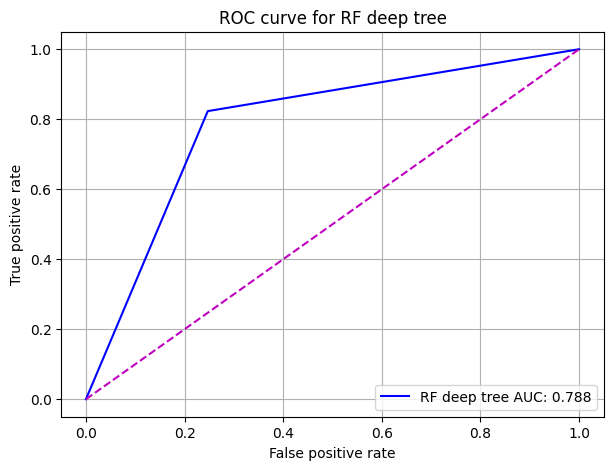

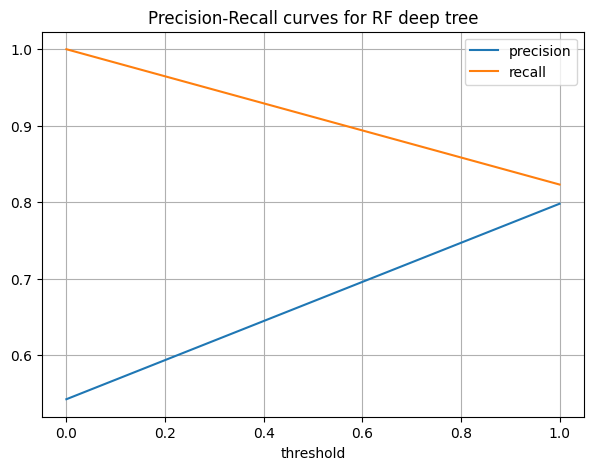

In [93]:
model_4 = RandomForestClassifier(n_estimators = 50, max_depth = 15, random_state = 1)
# Train the model using the training dataset with Decision Tree Classifier
model_4.fit(X_train, y_train)  
predicted_values = model_4.predict(X_test)

# Get the evaluation metrics for the deep tree model
get_metrics(model_4, y_test, predicted_values, "RF deep tree")   
get_ROC_plot(model_4, y_test, predicted_values, "RF deep tree")
get_prec_recall_plot(y_test, predicted_values, "RF deep tree")

## METHOD TO AVOID TYPE II (FALSE NEGATIVE) ERROR**

Recall should be > 0.95

In [95]:
# 1 scatter plot
def scatter(actual, predicted, T):
    plt.scatter(actual, predicted, c=actual, cmap='viridis', alpha=0.7)
    plt.xlabel("Labels")
    plt.ylabel("Predicted probabilities")
    plt.plot([-0.2, 1.2], [T, T], 'r--')
    plt.axis([-0.1, 1.1, -0.1, 1.1])
    plt.colorbar(label='True Label (0 or 1)')

# many scatter plots
def many_scatters(actuals, predicteds, Ts, titles, shape):
    plt.figure(figsize=(shape[1]*5, shape[0]*5))
    i = 1
    for actual, predicted, T, title in zip(actuals, predicteds, Ts, titles):
        ax = plt.subplot(shape[0], shape[1], i)
        ax.set_title(title)
        i += 1
        scatter(actual, predicted, T)

Precision - 0.543
Recall - 1.0
Accuracy - 0.543
F1-score - 0.704
Log-Loss - 0.567


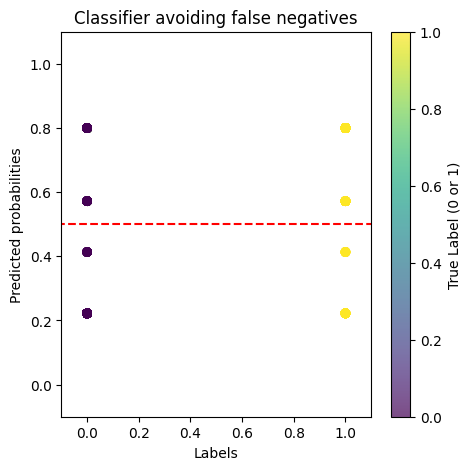

In [96]:
y_proba = model_1.predict_proba(X_test)
y_proba = y_proba[:, 1]
y_pred_new = np.where(y_proba > 0.1, 1, 0)
print(f'Precision - {round(precision_score(y_test,y_pred_new),3)}')
print(f'Recall - {round(recall_score(y_test,y_pred_new),3)}')
print(f'Accuracy - {round(accuracy_score(y_test,y_pred_new),3)}')
print(f'F1-score - {round(f1_score(y_test,y_pred_new),3)}')
print(f'Log-Loss - {round(log_loss(y_test,y_proba),3)}')

many_scatters([y_test], [y_proba], 
              [0.5], ["Classifier avoiding false negatives"], (1,1))


Precision - 0.543
Recall - 1.0
Accuracy - 0.543
F1-score - 0.704
Log-Loss - 0.625


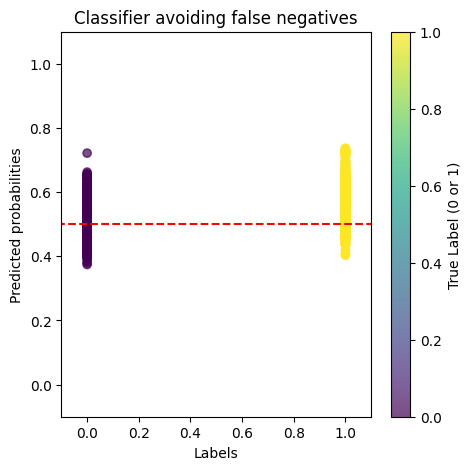

In [97]:
y_proba = model_3.predict_proba(X_test)
y_proba = y_proba[:, 1]
y_pred_new = np.where(y_proba > 0.2, 1, 0)
print(f'Precision - {round(precision_score(y_test,y_pred_new),3)}')
print(f'Recall - {round(recall_score(y_test,y_pred_new),3)}')
print(f'Accuracy - {round(accuracy_score(y_test,y_pred_new),3)}')
print(f'F1-score - {round(f1_score(y_test,y_pred_new),3)}')
print(f'Log-Loss - {round(log_loss(y_test,y_proba),3)}')


many_scatters([y_test], [y_proba], 
              [0.5], ["Classifier avoiding false negatives"], (1,1))


Precision - 0.601
Recall - 0.984
Accuracy - 0.638
F1-score - 0.747
Log-Loss - 0.476


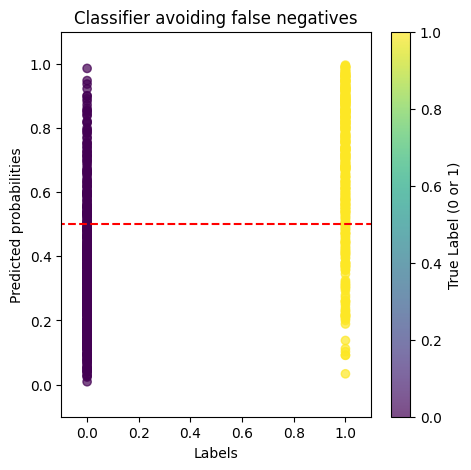

In [98]:
y_proba = model_4.predict_proba(X_test)
y_proba = y_proba[:, 1]
y_pred_new = np.where(y_proba > 0.2, 1, 0)

print(f'Precision - {round(precision_score(y_test,y_pred_new),3)}')
print(f'Recall - {round(recall_score(y_test,y_pred_new),3)}')
print(f'Accuracy - {round(accuracy_score(y_test,y_pred_new),3)}')
print(f'F1-score - {round(f1_score(y_test,y_pred_new),3)}')
print(f'Log-Loss - {round(log_loss(y_test,y_proba),3)}')


many_scatters([y_test], [y_proba], 
              [0.5], ["Classifier avoiding false negatives"], (1,1))


Precision - 0.565
Recall - 0.969
Accuracy - 0.579
F1-score - 0.714
Log Loss - 2.624


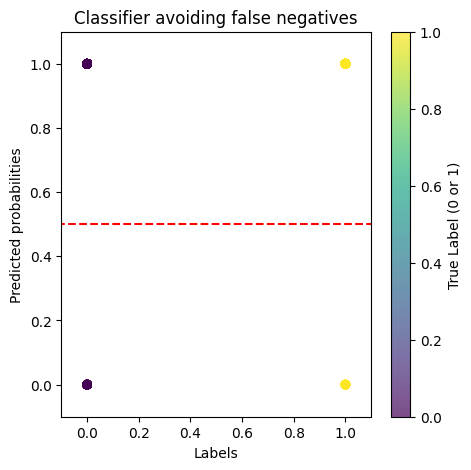

In [100]:
model_2 = DecisionTreeClassifier(max_depth=15, class_weight={0:1.0, 1:150.0})
model_2.fit(X_train, y_train)
y_pred_2 = model_2.predict(X_test)
y_pred_prob_2 = model_2.predict_proba(X_test)

print(f'Precision - {round(precision_score(y_test,y_pred_2),3)}')
print(f'Recall - {round(recall_score(y_test,y_pred_2),3)}')
print(f'Accuracy - {round(accuracy_score(y_test,y_pred_2),3)}')
print(f'F1-score - {round(f1_score(y_test,y_pred_2),3)}')
print(f'Log Loss - {round(log_loss(y_test,y_pred_prob_2),3)}')

many_scatters([y_test], [y_pred_2], [0.5], 
              ["Classifier avoiding false negatives"], (1,1))
